In [1]:
import diplib as dip
import numpy as np

# draw a sphere into a 3D binary image
sphere_image = np.zeros((100, 100, 100), dtype=np.uint8)
center = np.array(sphere_image.shape) // 2
Z, Y, X = np.ogrid[:100, :100, :100]
sphere = (X - center[2])**2 + (Y - center[1])**2 + (Z - center[0])**2 <= 40**2
sphere_image[sphere] = 1

DIPlib -- a quantitative image analysis library
Version 3.4.3 (Mar 21 2024)
For more information see https://diplib.org


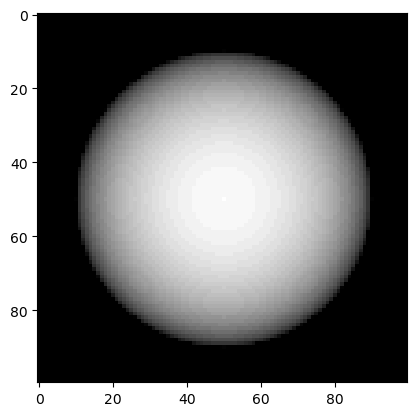

In [3]:
img = dip.Image(sphere_image)
img.Show()

In [9]:
measurement = dip.MeasurementTool.Measure(sphere_image, sphere_image, features=["SurfaceArea", "P2A", "Size"])

In [32]:
import pandas as pd
objects = [o for o in measurement.Objects()]
a_dict = {"label": objects}
for f in measurement.Features():
    a_dict[f.name] = [measurement[f.name][o][0] for o in objects]

pd.DataFrame(a_dict)

,label,SurfaceArea,P2A,Size
0,1,20067.516301,0.998313,267761.0


['SurfaceArea', 'P2A', 'Size']

In [19]:
[f for f in measurement.Values()]

[<ValueInformation: name=SurfaceArea, units=px^2>,
 <ValueInformation: name=, units=>,
 <ValueInformation: name=, units=px^3>]

In [23]:
[o for o in measurement.Objects()]

[1]